## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

W0726 15:47:44.176442 14024 deprecation_wrapper.py:119] From D:\python\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 15:47:44.233335 14024 deprecation_wrapper.py:119] From D:\python\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 15:47:44.238826 14024 deprecation_wrapper.py:119] From D:\python\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.0015)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0726 15:47:48.775377 14024 deprecation_wrapper.py:119] From D:\python\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0726 15:47:48.792346 14024 deprecation_wrapper.py:119] From D:\python\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)



W0726 15:47:54.646942 14024 deprecation.py:323] From D:\python\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0726 15:47:54.810638 14024 deprecation_wrapper.py:119] From D:\python\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 12s 242us/step - loss: 2.2500 - acc: 0.1778 - val_loss: 2.2003 - val_acc: 0.2189
Epoch 2/500
50000/50000 [==============================] - 5s 103us/step - loss: 2.1613 - acc: 0.2345 - val_loss: 2.1305 - val_acc: 0.2358
Epoch 3/500
50000/50000 [==============================] - 5s 102us/step - loss: 2.0964 - acc: 0.2536 - val_loss: 2.0757 - val_acc: 0.2615
Epoch 4/500
50000/50000 [==============================] - 5s 99us/step - loss: 2.0484 - acc: 0.2690 - val_loss: 2.0354 - val_acc: 0.2729
Epoch 5/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.0099 - acc: 0.2857 - val_loss: 2.0002 - val_acc: 0.2866
Epoch 6/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.9776 - acc: 0.2980 - val_loss: 1.9708 - val_acc: 0.3010
Epoch 7/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.9494 - acc: 0.3095 - val_loss: 1.

50000/50000 [==============================] - 6s 115us/step - loss: 1.5556 - acc: 0.4542 - val_loss: 1.5748 - val_acc: 0.4453
Epoch 60/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.5518 - acc: 0.4537 - val_loss: 1.5774 - val_acc: 0.4419
Epoch 61/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.5473 - acc: 0.4581 - val_loss: 1.5775 - val_acc: 0.4418
Epoch 62/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.5439 - acc: 0.4581 - val_loss: 1.5828 - val_acc: 0.4412
Epoch 63/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.5403 - acc: 0.4586 - val_loss: 1.5719 - val_acc: 0.4461
Epoch 64/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.5377 - acc: 0.4593 - val_loss: 1.5615 - val_acc: 0.4509
Epoch 65/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.5331 - acc: 0.4612 - val_loss: 1.5557 - val_acc: 0.4475
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 6s 116us/step - loss: 1.3840 - acc: 0.5130 - val_loss: 1.4484 - val_acc: 0.4844
Epoch 118/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.3818 - acc: 0.5130 - val_loss: 1.4521 - val_acc: 0.4779
Epoch 119/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.3853 - acc: 0.5110 - val_loss: 1.4607 - val_acc: 0.4830
Epoch 120/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.3775 - acc: 0.5147 - val_loss: 1.4454 - val_acc: 0.4892
Epoch 121/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.3746 - acc: 0.5149 - val_loss: 1.4540 - val_acc: 0.4849
Epoch 122/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.3726 - acc: 0.5151 - val_loss: 1.4350 - val_acc: 0.4889
Epoch 123/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.3725 - acc: 0.5163 - val_loss: 1.5273 - val_acc: 0.4658
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 5s 97us/step - loss: 1.2595 - acc: 0.5567 - val_loss: 1.3915 - val_acc: 0.5021
Epoch 176/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.2601 - acc: 0.5561 - val_loss: 1.4048 - val_acc: 0.50030s - loss: 1.2578 - acc
Epoch 177/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.2560 - acc: 0.5559 - val_loss: 1.4324 - val_acc: 0.4869
Epoch 178/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.2562 - acc: 0.5573 - val_loss: 1.3728 - val_acc: 0.5089
Epoch 179/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.2526 - acc: 0.5590 - val_loss: 1.3831 - val_acc: 0.5097
Epoch 180/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.2501 - acc: 0.5601 - val_loss: 1.3901 - val_acc: 0.5068
Epoch 181/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.2473 - acc: 0.5606 - val_loss: 1.4234 - val_acc: 0.4961
Epoch 1

50000/50000 [==============================] - 6s 122us/step - loss: 1.1584 - acc: 0.5927 - val_loss: 1.5915 - val_acc: 0.4662
Epoch 234/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.1556 - acc: 0.5933 - val_loss: 1.3898 - val_acc: 0.5052
Epoch 235/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.1516 - acc: 0.5955 - val_loss: 1.4272 - val_acc: 0.5019
Epoch 236/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.1520 - acc: 0.5931 - val_loss: 1.4552 - val_acc: 0.4896
Epoch 237/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.1511 - acc: 0.5934 - val_loss: 1.3575 - val_acc: 0.5184
Epoch 238/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.1529 - acc: 0.5956 - val_loss: 1.4152 - val_acc: 0.5049
Epoch 239/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.1410 - acc: 0.5964 - val_loss: 1.3678 - val_acc: 0.5155
Epoch 240/500
50000/50000 [=

50000/50000 [==============================] - 6s 120us/step - loss: 1.0573 - acc: 0.6267 - val_loss: 1.3971 - val_acc: 0.5132
Epoch 292/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.0592 - acc: 0.6268 - val_loss: 1.3557 - val_acc: 0.5227
Epoch 293/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.0531 - acc: 0.6290 - val_loss: 1.4619 - val_acc: 0.4896
Epoch 294/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.0570 - acc: 0.6267 - val_loss: 1.3564 - val_acc: 0.5243
Epoch 295/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.0576 - acc: 0.6278 - val_loss: 1.3488 - val_acc: 0.5209
Epoch 296/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.0541 - acc: 0.6287 - val_loss: 1.3856 - val_acc: 0.5129
Epoch 297/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.0535 - acc: 0.6271 - val_loss: 1.3380 - val_acc: 0.5264
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 5s 97us/step - loss: 0.9643 - acc: 0.6600 - val_loss: 1.6306 - val_acc: 0.4707
Epoch 350/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.9672 - acc: 0.6603 - val_loss: 1.4903 - val_acc: 0.4939
Epoch 351/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.9612 - acc: 0.6621 - val_loss: 1.4739 - val_acc: 0.5060
Epoch 352/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.9646 - acc: 0.6613 - val_loss: 1.4548 - val_acc: 0.4985
Epoch 353/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.9539 - acc: 0.6628 - val_loss: 1.4228 - val_acc: 0.5138
Epoch 354/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.9651 - acc: 0.6624 - val_loss: 1.4585 - val_acc: 0.4977
Epoch 355/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.9501 - acc: 0.6646 - val_loss: 1.4181 - val_acc: 0.5132
Epoch 356/500
50000/50000 [==

50000/50000 [==============================] - 6s 121us/step - loss: 0.8755 - acc: 0.6923 - val_loss: 1.5731 - val_acc: 0.4791
Epoch 407/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.8719 - acc: 0.6937 - val_loss: 1.4193 - val_acc: 0.5165
Epoch 408/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.8703 - acc: 0.6947 - val_loss: 1.3879 - val_acc: 0.5237
Epoch 409/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.8649 - acc: 0.6962 - val_loss: 1.5271 - val_acc: 0.5069
Epoch 410/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.8694 - acc: 0.6961 - val_loss: 1.5617 - val_acc: 0.5012
Epoch 411/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.8647 - acc: 0.6974 - val_loss: 1.6303 - val_acc: 0.4730
Epoch 412/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.8691 - acc: 0.6943 - val_loss: 1.5094 - val_acc: 0.5035
Epoch 413/500
50000/50000 [==

50000/50000 [==============================] - 6s 111us/step - loss: 0.7796 - acc: 0.7290 - val_loss: 1.5177 - val_acc: 0.5091
Epoch 465/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.7765 - acc: 0.7304 - val_loss: 1.4297 - val_acc: 0.5278
Epoch 466/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.7915 - acc: 0.7247 - val_loss: 1.4370 - val_acc: 0.5228
Epoch 467/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.7731 - acc: 0.7311 - val_loss: 1.5318 - val_acc: 0.5136
Epoch 468/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.7661 - acc: 0.7322 - val_loss: 1.5386 - val_acc: 0.5022
Epoch 469/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.7732 - acc: 0.7327 - val_loss: 1.6297 - val_acc: 0.4873
Epoch 470/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.7726 - acc: 0.7316 - val_loss: 1.5307 - val_acc: 0.5061
Epoch 471/500
50000/50000 [

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

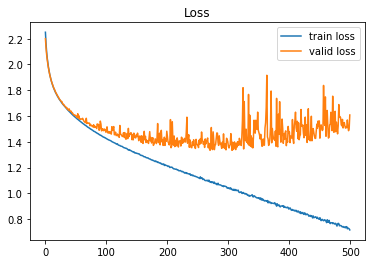

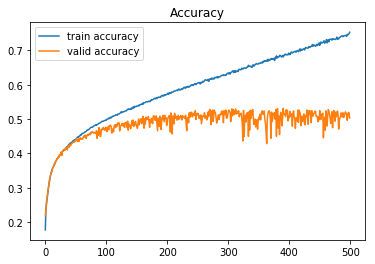

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()